In [149]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import seaborn as sns
import joblib
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [150]:
df = pd.read_csv('EV_Predictive_Maintenance_Dataset_15min.csv')
print(df.head())

             Timestamp       SoC       SoH  Battery_Voltage  Battery_Current  \
0  2020-01-01 00:00:00  0.826099  0.941338       210.163881       -22.753095   
1  2020-01-01 00:15:00  0.064728  0.916059       364.000102       -27.701120   
2  2020-01-01 00:30:00  0.873643  0.908020       388.855089       -36.646406   
3  2020-01-01 00:45:00  0.853009  0.916476       370.570602       -37.609429   
4  2020-01-01 01:00:00  0.947540  0.913206       390.011904       -14.275808   

   Battery_Temperature  Charge_Cycles  Motor_Temperature  Motor_Vibration  \
0            27.149201     149.190930          48.496049         0.369095   
1            53.655101     171.702388          57.829492         1.449195   
2            29.559090     191.617645          46.518363         1.859045   
3            29.690283     111.881817          54.163681         0.381500   
4            28.864338     163.774377          42.075978         0.433927   

   Motor_Torque  ...  Load_Weight  Driving_Speed  Distan

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175393 entries, 0 to 175392
Data columns (total 30 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Timestamp               175393 non-null  object 
 1   SoC                     175393 non-null  float64
 2   SoH                     175393 non-null  float64
 3   Battery_Voltage         175393 non-null  float64
 4   Battery_Current         175393 non-null  float64
 5   Battery_Temperature     175393 non-null  float64
 6   Charge_Cycles           175393 non-null  float64
 7   Motor_Temperature       175393 non-null  float64
 8   Motor_Vibration         175393 non-null  float64
 9   Motor_Torque            175393 non-null  float64
 10  Motor_RPM               175393 non-null  float64
 11  Power_Consumption       175393 non-null  float64
 12  Brake_Pad_Wear          175393 non-null  float64
 13  Brake_Pressure          175393 non-null  float64
 14  Reg_Brake_Efficiency

In [152]:
df.isnull().sum()

Timestamp                 0
SoC                       0
SoH                       0
Battery_Voltage           0
Battery_Current           0
Battery_Temperature       0
Charge_Cycles             0
Motor_Temperature         0
Motor_Vibration           0
Motor_Torque              0
Motor_RPM                 0
Power_Consumption         0
Brake_Pad_Wear            0
Brake_Pressure            0
Reg_Brake_Efficiency      0
Tire_Pressure             0
Tire_Temperature          0
Suspension_Load           0
Ambient_Temperature       0
Ambient_Humidity          0
Load_Weight               0
Driving_Speed             0
Distance_Traveled         0
Idle_Time                 0
Route_Roughness           0
RUL                       0
Failure_Probability       0
Maintenance_Type          0
TTF                       0
Component_Health_Score    0
dtype: int64

In [153]:
df['Failure_Binary'] = (df['Failure_Probability'] > 0.5).astype(int)
X = df.drop(columns=['Failure_Binary', 'Failure_Probability','RUL','Maintenance_Type'])
y = df['Failure_Binary']
y_rul = df['RUL']
y_maint = df['Maintenance_Type']

In [154]:
print(X.dtypes)

Timestamp                  object
SoC                       float64
SoH                       float64
Battery_Voltage           float64
Battery_Current           float64
Battery_Temperature       float64
Charge_Cycles             float64
Motor_Temperature         float64
Motor_Vibration           float64
Motor_Torque              float64
Motor_RPM                 float64
Power_Consumption         float64
Brake_Pad_Wear            float64
Brake_Pressure            float64
Reg_Brake_Efficiency      float64
Tire_Pressure             float64
Tire_Temperature          float64
Suspension_Load           float64
Ambient_Temperature       float64
Ambient_Humidity          float64
Load_Weight               float64
Driving_Speed             float64
Distance_Traveled         float64
Idle_Time                 float64
Route_Roughness           float64
TTF                       float64
Component_Health_Score    float64
dtype: object


In [155]:
from sklearn.preprocessing import LabelEncoder

for col in X.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))


In [156]:
import joblib
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [157]:
#drop_cols = ['Timestamp']
#df = df.drop(columns=drop_cols) 

In [158]:
print(X.dtypes)

Timestamp                   int64
SoC                       float64
SoH                       float64
Battery_Voltage           float64
Battery_Current           float64
Battery_Temperature       float64
Charge_Cycles             float64
Motor_Temperature         float64
Motor_Vibration           float64
Motor_Torque              float64
Motor_RPM                 float64
Power_Consumption         float64
Brake_Pad_Wear            float64
Brake_Pressure            float64
Reg_Brake_Efficiency      float64
Tire_Pressure             float64
Tire_Temperature          float64
Suspension_Load           float64
Ambient_Temperature       float64
Ambient_Humidity          float64
Load_Weight               float64
Driving_Speed             float64
Distance_Traveled         float64
Idle_Time                 float64
Route_Roughness           float64
TTF                       float64
Component_Health_Score    float64
dtype: object


In [159]:
print(df.columns)


Index(['Timestamp', 'SoC', 'SoH', 'Battery_Voltage', 'Battery_Current',
       'Battery_Temperature', 'Charge_Cycles', 'Motor_Temperature',
       'Motor_Vibration', 'Motor_Torque', 'Motor_RPM', 'Power_Consumption',
       'Brake_Pad_Wear', 'Brake_Pressure', 'Reg_Brake_Efficiency',
       'Tire_Pressure', 'Tire_Temperature', 'Suspension_Load',
       'Ambient_Temperature', 'Ambient_Humidity', 'Load_Weight',
       'Driving_Speed', 'Distance_Traveled', 'Idle_Time', 'Route_Roughness',
       'RUL', 'Failure_Probability', 'Maintenance_Type', 'TTF',
       'Component_Health_Score', 'Failure_Binary'],
      dtype='object')


In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [161]:
xgb_model = XGBClassifier(
    n_estimators=200,         # more trees
    learning_rate=0.1,        # shrinkage rate
    max_depth=6,              # tree depth
    subsample=0.8,            # row sampling
    colsample_bytree=0.8,     # feature sampling
    random_state=42,
    eval_metric='logloss'     # prevents warning
)

xgb_model.fit(X_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [162]:
y_pred = xgb_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("classifier Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8998261067875367
Confusion Matrix:
 [[31565     0]
 [ 3514     0]]
classifier Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95     31565
           1       0.00      0.00      0.00      3514

    accuracy                           0.90     35079
   macro avg       0.45      0.50      0.47     35079
weighted avg       0.81      0.90      0.85     35079



c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(averag

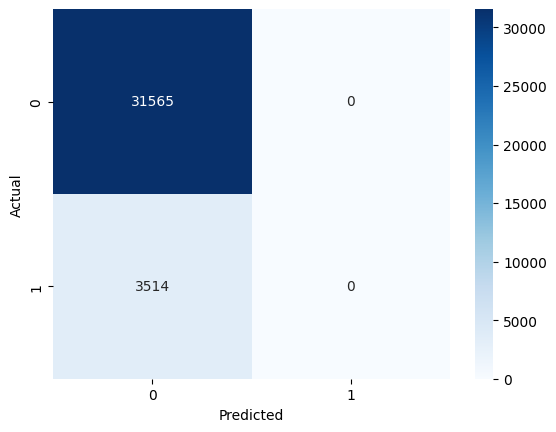

In [163]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [164]:
from joblib import dump, load #dump is used to save the model and load is used to load the model
with open('xgboost.pkl', 'wb') as f:
    dump(xgb_model, f)  #dumping the model onto the file 
    print("Model saved successfully!")

Model saved successfully!


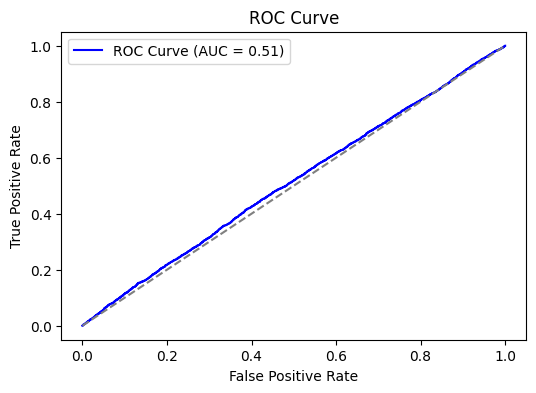

In [165]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities
y_probs = xgb_model.predict_proba(X_test)[:,1]  

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color="blue", label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0,1],[0,1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


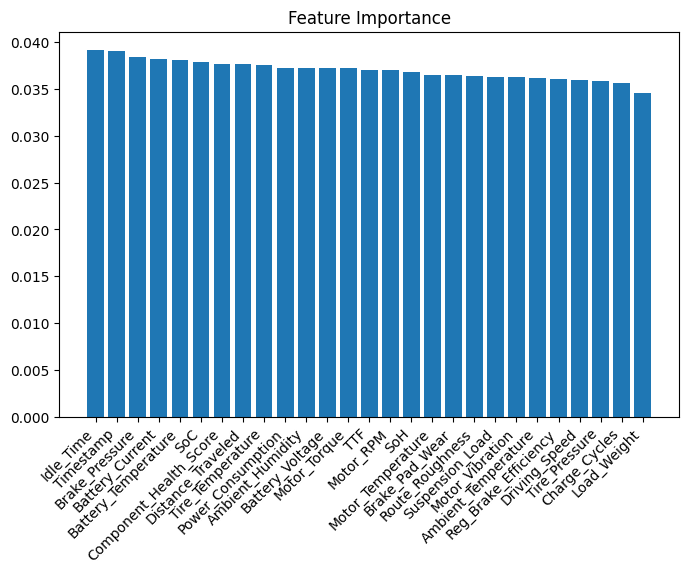

In [166]:
import pandas as pd
import numpy as np

# Feature importance
importances = xgb_model.feature_importances_
features = X_train.columns

# Sort
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(8,5))
plt.bar(range(len(features)), importances[indices], align="center")
plt.xticks(range(len(features)), [features[i] for i in indices], rotation=45, ha="right")
plt.title("Feature Importance")
plt.show()


In [167]:
X_train, X_test, y_train, y_test = train_test_split(X, y_rul, test_size=0.2, random_state=42)

reg = XGBRegressor(random_state=42)
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

print("Regression (RUL):")
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

Regression (RUL):
MSE: 7498.238423408569
R²: -0.032293457523588476


In [168]:
joblib.dump(reg, "RUL_Model.pkl")
print("✅ RUL Model saved successfully!")

✅ RUL Model saved successfully!


In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y_maint, test_size=0.2, random_state=42)

clf = XGBClassifier(eval_metric="mlogloss", random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Multiclass Classification (Maintenance Type):")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Multiclass Classification (Maintenance Type):
Accuracy: 0.7000199549588073
              precision    recall  f1-score   support

           0       0.70      1.00      0.82     24567
           1       0.22      0.00      0.00      5270
           2       0.00      0.00      0.00      3446
           3       0.00      0.00      0.00      1796

    accuracy                           0.70     35079
   macro avg       0.23      0.25      0.21     35079
weighted avg       0.52      0.70      0.58     35079



c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(averag

In [170]:
joblib.dump(clf, "Maintenance_Type_Model.pkl")
print("✅ Maintenance Type Model saved successfully!")

✅ Maintenance Type Model saved successfully!
